['/Users/Vincent/Library/CloudStorage/GoogleDrive-fireball2.telescope@gmail.com/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2025/DOBC_data/240904/2024_diffuse_T-92/tilted.csv', '/Users/Vincent/Library/CloudStorage/GoogleDrive-fireball2.telescope@gmail.com/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2025/DOBC_data/240904/2024_diffuse_T-92/QSO.csv', '/Users/Vincent/Library/CloudStorage/GoogleDrive-fireball2.telescope@gmail.com/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2025/DOBC_data/240904/2024_diffuse_T-92/BQSO.csv', '/Users/Vincent/Library/CloudStorage/GoogleDrive-fireball2.telescope@gmail.com/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2025/DOBC_data/240904/2024_diffuse_T-92/F3.csv', '/Users/Vincent/Library/CloudStorage/GoogleDrive-fireball2.telescope@gmail.com/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2025/DOBC_data/240904/2024_diffuse_T

Removed no burn in
Removed no burn in
Removed no burn in
tilted
Removed no burn in
QSO
Removed no burn in
BQSO
Removed no burn in
F3
Removed no burn in
F1
Removed no burn in
F2
Removed no burn in
F4


Removed no burn in


T,spatial,spectral
float64,float64,float64


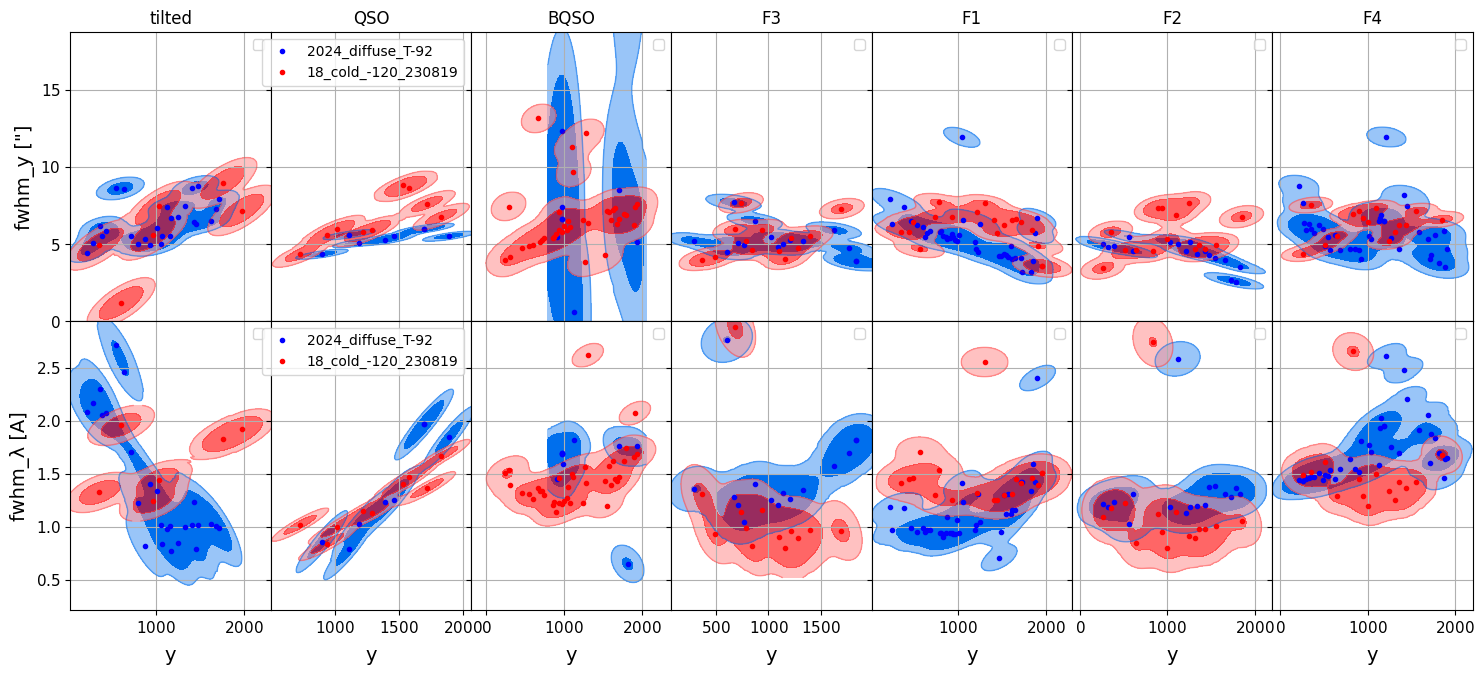

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

In [23]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jun  1 10:45:25 2022

@author: Vincent
"""


#%% FOR DAVE / DREW BEGINNING FTS 2023
#2023

# Show plots inline, and load main getdist plot module and samples class
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import os
import numpy as np
import glob 
from astropy.table import Table
from astropy.io import fits
def analyze_focus(path=None, path1=None,path2=None,lims=[0]*15,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=True,order=np.arange(10),masks=None,ylim=None,opt_pos=-9.3,det_pos=[-8.95,-9.7,-9.3],tilt=[-0.1,-0.1,-0.1],temp="TEMPD",fitdeg=2): #
    # if len(files)==6:
    #     if "2022_1" in path:
    #         order = [0,-1,1,2]
    #         lims = [0,0,0,0]
    #         # sens = [-1,-1,1,1,1,1,1]
    #     else:
    #         lims = [0,1000,800,800,1000,0,0]
    #         order = [-1,-2,0,3,1,2]
        
    #     order = [-1,-2,0,3,1,2]
    #     lims = [0,0,0,0,0,0]
    # else:
    #     lims=np.zeros(len(files))


    if path is not None:
        files = glob.glob(path)
        files.sort()
    else:
        files=[]
    if path1 is not None:
        files1 = glob.glob(path1)
        files1.sort()
    else:
        files1=[]
    if path2 is not None:
        files2 = glob.glob(path2)
        files2.sort()
    else:
        files2=[]


    files = [files[o] for o in order[:len(files)]]
    files1 = [files1[o] for o in order[:len(files1)]]
    files2 = [files2[o] for o in order[:len(files2)]]

    alpha=0.6
    if not pixel:
        ps_spatial = 1.1
        ps_spectral = 0.21
        ylim_spatial = (0,17*ps_spatial)
        ylim_spectral = (1*ps_spectral,14*ps_spectral)
        unit_spatial = ' ["]'
        unit_spectral = ' [A]'
    else:
        ps_spatial = 1
        ps_spectral = 1
        ylim_spatial = (3,12)
        ylim_spectral = (1,20)
        unit_spatial = ' [pix]'
        unit_spectral = ' [pix]'
    
    xx = np.linspace(-2000,3000,4000)
    line = 1 if masks is not None else 0
    

    if slit_size:
        fig, axes = plt.subplots(4+line,len(files),figsize=(len(files)*3,12),sharey="row",sharex=False)
    else:
        fig, axes = plt.subplots(2+line,len(files),figsize=(15,7),sharey="row",sharex=False)
    fig.suptitle(title)

    if masks is not None:
        for file in glob.glob(masks):
            a = Table.read(file,format='ascii')
            a['col2'][a['col2']=="None"]="inf"
            a['col2'] = a['col2'].astype(float)
            # plt.plot(a['col1'],a['col2'])
            if ylim is None:
                ymean = np.nanmedian(a['col2'])
                # print(ymean)
                ylim = (ymean-1,ymean+1)
                #(-10,-8)

            for i, (ax,lim) in enumerate(zip(axes[-1],[-200,-120,-80,-40,0,40])):
                ax.plot(a['col1'],a['col2'] ,'k.')   
                ax.set_xlim((lim+1,lim+40-1))
                ax.hlines(opt_pos,-200,200,color="k")#,label="ideal det position")
                for d,t,c in zip(det_pos,tilt,["b","r","g"]):
                    ax.plot([lim+7,lim+40-10],[d-t,d+t],color=c,label="Prev pos: %0.2f"%(d))
                if i==0:
                    ax.plot(a['col1']-360,a['col2'] ,'k.')#,label="masks")    
                    ax.legend(fontsize=8)
        axes[-1][0].set_ylim(ylim)

    cat_temp = Table(names=["T","spatial","spectral"])
    # files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/grid/*_cat.fits")
    # names_ = ["2018","1","2 -100","3","3 -100","4 -70","4 -105"]
    # temp = [fits.open(f.replace(".csv",".fits"))[0].header["TEMPB"] for f in files]
    names_ = [os.path.basename(file).split(".csv")[0].split("_")[0] for file in files]#.split("_2022_5")[0]
    # names_ = [os.path.basename(file).split(".csv")[0].split("_")[2] for file in files]#.split("_2022_5")[0]
    print(files,axes.T,lims, names_)
    # names_ = [os.path.basename(file).split("old_tilted")[1].split(".csv")[0] for file in files]#.split("_2022_5")[0]
    for i, (file, ax,lim,name) in enumerate(zip(files,axes.T,lims, names_)):
        # print(name)
        cat = Table.read(file)
        if not pixel:
            cat['fwhm_x'] *= ps_spectral
            cat['fwhm_y'] *= ps_spatial
        try:
            t = fits.open(file.replace(".csv",".fits"))[0].header[temp]
            # print(t)
        except (FileNotFoundError,KeyError) as e:
            # print(e)
            t=""
        if cat["x"].max()>1500:
            mask = (cat["x"]<2100) &  (cat["x"]>1170) & (cat["y"]>200)  & (cat["y"]<2000)  & (cat["y"]<2000) &( (cat["line"]==214)|(cat["line"]==-99)) # & (cat["FLUX_MAX"]>lim) #& (cat["X2_IMAGE"]>5)
        else:
            mask = cat["x"]>20
        names = ['x','y','fwhm_x','fwhm_y', 'fwhm_x_unsmear','lx','ly']#,'lx_unsmear','smearing']
        samples = MCSamples(samples=[cat[mask][n] for n in names],names = names, labels =["",""],settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})#,ax=ax)
        g = plots.get_single_plotter()#width_inch=4, ratio=1)
        g.plot_2d([samples], x, 'fwhm_y', filled=True,ax=ax[0],add_legend_proxy=False)
        g.plot_2d([samples], x, 'fwhm_x', filled=True,ax=ax[1])
        if slit_size:
            try:
                g.plot_2d([samples], x, 'lx', filled=True,ax=ax[2])
            except Exception as e:
                # print(e)
                pass
            g.plot_2d([samples], x, 'ly', filled=True,ax=ax[3])
            
            ax[2].plot(cat[mask][x],cat[mask]["lx"],'.b')
            ax[3].plot(cat[mask][x],cat[mask]["ly"],'.b')
            ax[2].set_ylim((3,13.9))
            ax[3].set_ylim((9,49))
        ax[0].set_title( name)
        label=os.path.basename(os.path.dirname(file)) if i==1 else None
        if fit:
            fit=PlotFit1D(cat[mask][x],cat[mask]["fwhm_y"],deg=fitdeg,ax=ax[0])
            fit2 = PlotFit1D(cat[mask][x],cat[mask]["fwhm_x"],deg=fitdeg,ax=ax[1])
            title1 =  "T=%sC = %i pix"%(t[:5],xx[np.argmin(fit["function"](xx))])
            title2 =  "T=%sC = %i pix"%(t[:5],xx[np.argmin(fit2["function"](xx))])
            title1 =  fit["popt"]
            title2 =   fit2["popt"]
            print(fit2["popt"][0])
            # print(fit2["popt"][1])
            ax[0].plot(cat[mask][x],cat[mask]["fwhm_y"],'.b',label=label)
            ax[1].plot(cat[mask][x],cat[mask]["fwhm_x"],'.b',label=label)
            try:
                print(len(cat.colnames),len((float(t[:5]),xx[np.argmin(fit["function"](xx))],xx[np.argmin(fit2["function"](xx))])))
                cat_temp.add_row(vals=(float(t[:5]),xx[np.argmin(fit["function"](xx))],xx[np.argmin(fit2["function"](xx))]))
            except ValueError:
                pass
        else:
            title1 =  "T=%sC"%(t[:5])
            title2 =  "T=%sC"%(t[:5])
            ax[0].plot(cat[mask][x],cat[mask]["fwhm_y"],'.b',label=label)
            ax[1].plot(cat[mask][x],cat[mask]["fwhm_x"],'.b',label=label)
        ax[0].legend(loc="upper left",title=title1)
        ax[1].legend(loc="upper left",title=title2)
  
    for i, (file, ax,lim,name) in enumerate(zip(files1,axes.T,lims, names_)):
        print(name)
        cat = Table.read(file)
        if not pixel:
            cat['fwhm_x'] *= ps_spectral
            cat['fwhm_y'] *= ps_spatial
        label=os.path.basename(os.path.dirname(file)) if i==1 else None
  
        if cat["x"].max()>1500:
            mask = (cat["x"]<2100) &  (cat["x"]>1170) & (cat["y"]>200)  & (cat["y"]<2000)  & (cat["y"]<2000) &( (cat["line"]==214)|(cat["line"]==-99)) # & (cat["FLUX_MAX"]>lim) #& (cat["X2_IMAGE"]>5)
        else:
            mask = cat["x"]>20
        names = ['x','y','fwhm_x','fwhm_y', 'fwhm_x_unsmear','lx','ly']#,'lx_unsmear','smearing']
        samples = MCSamples(samples=[cat[mask][n] for n in names],names = names, labels =["",""],settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})#,ax=ax)
        g = plots.get_single_plotter()#width_inch=4, ratio=1)
        g.plot_2d([samples], x, 'fwhm_y', filled=True,ax=ax[0],add_legend_proxy=False,colors=["r"],alphas=[alpha])
        
        g.plot_2d([samples], x, 'fwhm_x', filled=True,ax=ax[1],colors=["r"],alphas=[alpha])
        ax[0].plot(cat[mask][x],cat[mask]["fwhm_y"],'.r',label=label)
        ax[1].plot(cat[mask][x],cat[mask]["fwhm_x"],'.r',label=label)
        if slit_size:
            try:
                g.plot_2d([samples], x, 'lx', filled=True,ax=ax[2],colors=["r"],alphas=[alpha])
            except Exception as e:
                zprint(e)
                pass
            g.plot_2d([samples], x, 'ly', filled=True,ax=ax[3],colors=["r"],alphas=[alpha])
            ax[2].plot(cat[mask][x],cat[mask]["lx"],'.r')
            ax[3].plot(cat[mask][x],cat[mask]["ly"],'.r')


    for i, (file, ax,lim,name) in enumerate(zip(files2,axes.T,lims, names_)):
        print(name)
        cat = Table.read(file)
        if not pixel:
            cat['fwhm_x'] *= ps_spectral
            cat['fwhm_y'] *= ps_spatial
        print(i)
        label=os.path.basename(os.path.dirname(file)) if i==1 else None
        if cat["x"].max()>1500:
            mask = (cat["x"]<2100) &  (cat["x"]>1170) & (cat["y"]>200)  & (cat["y"]<2000)  & (cat["y"]<2000) &( (cat["line"]==214)|(cat["line"]==-99)) # & (cat["FLUX_MAX"]>lim) #& (cat["X2_IMAGE"]>5)
        else:
            mask = cat["x"]>20
        names = ['x','y','fwhm_x','fwhm_y', 'fwhm_x_unsmear','lx','ly']#,'lx_unsmear','smearing']
        samples = MCSamples(samples=[cat[mask][n] for n in names],names = names, labels =["",""],settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})#,ax=ax)
        g = plots.get_single_plotter()#width_inch=4, ratio=1)
        g.plot_2d([samples], x, 'fwhm_y', filled=True,ax=ax[0],add_legend_proxy=False,colors=["g"],alphas=[alpha])
        g.plot_2d([samples], x, 'fwhm_x', filled=True,ax=ax[1],colors=["g"],alphas=[alpha])
        ax[0].plot(cat[mask][x],cat[mask]["fwhm_y"],'.g',label=label)
        ax[1].plot(cat[mask][x],cat[mask]["fwhm_x"],'.g',label=label)
        if slit_size:
            
            try:
                g.plot_2d([samples], x, 'lx', filled=True,ax=ax[2],colors=["g"],alphas=[alpha])
            except Exception as e:
                print(e)

            g.plot_2d([samples], x, 'ly', filled=True,ax=ax[3],colors=["g"],alphas=[alpha])
            ax[2].plot(cat[mask][x],cat[mask]["lx"],'.g')
            ax[3].plot(cat[mask][x],cat[mask]["ly"],'.g')


    for file, ax,lim,name in zip(files,axes.T,lims, names_):
        for a in ax:
            a.grid()
        for a in ax[:-1]:
            a.set_xlabel(None)
        for a in ax[:]:
            a.set_ylabel(None)   
        if path1 is not None:
            ax[0].legend()#loc="upper left")#,title=title1)
            ax[1].legend()#loc="upper left")#,title=title2)

    if slit_size:
        ax[2].set_ylim((4,8))
        ax[3].set_ylim((10,39))
    for i,l in enumerate(['fwhm_y'+unit_spatial,'fwhm_λ'+unit_spectral,'lλ','ly']):
        try:
            axes[i][0].set_ylabel(l)
        except IndexError:
            pass
    ax[0].set_ylim(ylim_spatial)
    ax[1].set_ylim(ylim_spectral)
    fig.tight_layout()
    fig.subplots_adjust(hspace=0,wspace=0)    
    return cat_temp
  

analyze_focus(path="/Users/Vincent/Library/CloudStorage/GoogleDrive-fireball2.telescope@gmail.com/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2025/DOBC_data/240904/2024_diffuse_T-92/*.csv", path1="/Users/Vincent/Nextcloud/LAM_new_account/FIREBALL/all_diffuse_illumination/2023/18_cold_-120_230819/*.csv",path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=False,order=[-1,-2,0,3,1,2,4],masks=None,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([-9.7,-9.7]),tilt=np.array([-0.1,-0.1,-0.1])*0)




In [3]:

masks_2023a= '/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_6_March2023/*all*.txt'
masks_2023= '/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_6_March2023/*all*.txt'
 
  
test = "/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230525/diffusefocus/Catalogs/image0000*.csv"  
# analyze_focus(path=test, path1=None,path2=None,name="T" ,pixel=False, x="y",fit=True,fitdeg=1,title=None,slit_size=True,order=[-7,-6,-5,-4,-3,-2,-1][::-1]+ list(np.arange(8)),masks=None,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=[-9.5,-9.35],tilt=np.array([-0.1,-0.1,-0.1])*1.1)

colf_foc_14 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/14_cold_230515_0.34/*.csv"
colf_foc_15 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/15_cold_230609/*.csv"
colf_foc_15_213 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/15_cold_230609/*.csv"


cold_focus_16 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/16_cold_230612/202/*.csv"
cold_focus_16 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/16_cold_230612/*.csv"
cold_focus_16b = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/16_cold_230612/230615/*.csv"


# WARM_FOCUS_FTS_2023_0 = "..."
COLD_FOCUS_FTS_2023_0 = "/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230804/17_cold_230804/*.csv"
COLD_FOCUS_FTS_2023_m120 ="/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/18_cold_-120_230819/18_cold_-120_230819-100/*.csv"
analyze_focus(path=COLD_FOCUS_FTS_2023_0, path1=COLD_FOCUS_FTS_2023_m120,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=True,order=[-1,-2,0,3,1,2,4],masks=masks_2023,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([-9.7,-9.7]),tilt=np.array([-0.1,-0.1,-0.1])*0)



ValueError: Number of columns must be a positive integer, not 0

<Figure size 0x1200 with 0 Axes>

In [ ]:

#%%

analyze_focus(path=cold_focus_16b, path1=None,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=True,order=[-1,-2,0,3,1,2],masks=masks_2023,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([-9.7,-9.7]),tilt=np.array([-0.1,-0.1,-0.1])*0)

stack_images_path(paths=glob.glob("/Volumes/VINCENT/GOBC/220612/Detector_213/imstack_TF_*.fits"), Type="vstack", clipping=3, dtype=int, fname="", std=False, name=None)






#%% PLOT ALL ITERATIONS AT ONCE



import matplotlib.pyplot as plt

path = '/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_5_feb2023/metrology_+3_180_-180_2023-02-17_20_54_58.694282.txt'
path1 ='/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_6_March2023/metrology_caltech_all_2023-03-09_-179_179_2023-03-09_22:17:13.827241.txt'
fits_masks1 = []
fits_masks2 = []

fig, axes = plt.subplots(1,7,sharey=True,figsize=(12,2))
for p in [path,path1]:    
    a = Table.read(p,format="ascii")
    
    a['col2'][a['col2']=="None"]="NaN"
    a['col2'] = a['col2'].astype(float)
    if "_5_feb2023" in p:
        a['col2'][(a['col2']>0.7)]=np.nan
    else:
        a['col2'][(a['col2']>-8.7)]=np.nan
    a["col2"]=a["col2"]-np.nanmedian(a["col2"])
    a['col1'][a['col1']>165]=a['col1'][a['col1']>165]-360
    a['col2'][(a['col1']>120)]=np.nan
    # plt.plot(a['col1'],a['col2'],".")
    # plt.grid()
    

    for i, (ax,lim) in enumerate(zip(axes,[-200,-120,-80,-40,0,40,80])):
        # print(np.nanmedian(mask["col2"]))
        mask = a[(a['col1']>lim+1) & (a['col1']<lim+40+1)]
        mask["col1"]=mask["col1"]-np.nanmean(mask["col1"])+2
        ax.plot(mask['col1'],mask['col2'] ,'k.')   
        ax.set_xlim((-19,19))
        if "_5_feb2023" in p:
            fits_masks1.append(PlotFit1D(mask["col1"],mask["col2"],deg=2,ax=ax)["function"])
        else:
            fits_masks2.append(PlotFit1D(mask["col1"],mask["col2"],deg=2,ax=ax)["function"])
        ax.set_ylim((-1,0.7))
        ax.grid()


files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/**/*.csv")
files.sort()
for f in files[:]:
    cat=Table.read(f)
    name = os.path.basename(f)
    cat["angle_mask"] = (cat["y"]-1000)/100
    if "ilted" in f:
        i=0
    if "QSO" in f:
        i=1
    if "F1" in f:
        i=2
    if "F4" in f:
        i=3
    if "F2" in f:
        i=4
    if "F3" in f:
        i=5
    if "rid" in f:
        i=6
    if f in glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/[01234]_**/*.csv"):
        cat["elevation"] = fits_masks1[i]( cat["angle_mask"])
    else:
        cat["elevation"] = fits_masks2[i]( cat["angle_mask"])
        
    # axes[i].plot(cat["angle_mask"],  cat["elevation"],".")
    cat.write(f,overwrite=True)
fig.tight_layout()








files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/[01234]_**/tilted*.csv")
files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/[01234]_**/*.csv")


files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/[01234]_**/F4*.csv")
# files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/*cold*/*.csv")
# files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/**/*.csv")

files.sort()
fig,(ax, ax1) = plt.subplots(2,1,figsize=(10,8),sharex=True,sharey=True)
for f in files[:]:
    cat=Table.read(f)
    offset = os.path.basename(os.path.dirname(f)).split("_")[3]
    name = os.path.basename(f)
    if "ilted" in f:
        m="."
    if "QSO" in f:
        m="+"
    if "F1" in f:
        m="x"
    if "F4" in f:
        m="^"
    if "F2" in f:
        m="v"
    if "F3" in f:
        m="s"
    if "rid" in f:
        m="o"

    # if "grid" in f:
    #     ax.plot(cat["elevation"]+float(offset),cat[""],"o",label=os.path.basename(os.path.dirname(f)))
    #     ax1.plot(cat["elevation"]*1+1*float(offset),cat["fwhm_y"],"o",label=os.path.basename(os.path.dirname(f)))
        
    # else:
    ax.plot(cat["elevation"]+float(offset),cat["fwhm_x"],m)#,label=os.path.basename(os.path.dirname(f)))
    ax1.plot(cat["elevation"]*1+1*float(offset),cat["fwhm_y"],m,label=os.path.basename(os.path.dirname(f)))
# plt.legend(fontsize=8)
ax.plot([1],[0],"k.",label="tilted")
ax.plot([1],[0],"k+",label="QSO")
ax.plot([1],[0],"kx",label="F1")
ax.plot([1],[0],"kv",label="F2")
ax.plot([1],[0],"ks",label="F3")
ax.plot([1],[0],"k^",label="F4")
ax.plot([0.6,1.3],np.array([3,3])/0.9,"k:")
ax1.plot([0.6,1.3],np.array([0.6,0.6])/0.21,"k:")
ax1.set_xlabel("Slit elevation (mm)")
ax.set_ylabel("Spectral resolution FWHM (pix)")
ax1.set_ylabel("Spatial resolution FWHM (pix)")
ax.set_ylim((1,20))
ax.legend()
ax1.legend()
fig.tight_layout()
plt.show()






#%%

test = "/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230525/diffusefocus/Catalogs/image0000*.csv"  
fs = glob.glob(test)
fs.sort()
rots = np.array([os.path.basename(f).split("_")[2].split(".")[0] for f in fs],dtype=float)
rots = [r-180 if r>0 else 180 +r for r in rots]
plt.figure(figsize=(6,10))
# ro
# for f,r in zip(fs[-7:],rots[-7:]):
# for f,r in zip(fs[:10],rots):
for f,r in zip(fs,rots):
    cat = Table.read(f)
    if r<0:
        plt.plot(cat["X_IMAGE"],cat["Y_IMAGE"]+r*100,".",label="PA + %s"%(r))
    else:
        plt.plot(cat["X_IMAGE"],cat["Y_IMAGE"]+r*100+120,"P",label="PA + %s"%(r))
        pass
        # plt.plot(-cat["X_IMAGE"]+3900,cat["Y_IMAGE"]+r*100+120,"P",label="PA + %s"%(r))
        
plt.xlabel("X_det")
plt.ylabel("Y_det + 100 * PA")
plt.legend()
# cold_9 = "/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230515/14_cold_230515_0.34/*.csv"
# cold_8 ="/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/13_cold_230511_0.55/*.csv" 
# analyze_focus(path=cold_6, path1=cold_9,path2=UA5,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=True,order=[-1,-2,0,3,1,2],masks=masks_2023,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=[-9.5,-9.35],tilt=np.array([-0.1,-0.1,-0.1])*1.1)
# analyze_focus(path=cold_8, path1=UA2,path2=UA5,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=True,order=[-1,-2,0,3,1,2],masks=masks_2023,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=[-9.3,-9.3,-9.5],tilt=np.array([-0.1,-0.1,-0.1])*1.1)


   
# cat4 = analyze_focus(path=evol3, path1=None,path2=None,name="T" ,pixel=False, x="y",fit=True,title=None,slit_size=False,temp="TEMPD")#,order=[-1,-2,0,3,1,2],masks=masks,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([]),tilt=np.array([-0.1,-0.1,-0.1])*1.3)
# cat1 = analyze_focus(path=cool_down1, path1=None,path2=None,name="T" ,pixel=False, x="y",fit=True,title=None,slit_size=False,temp="TEMPB")#,order=[-1,-2,0,3,1,2],masks=masks,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([]),tilt=np.array([-0.1,-0.1,-0.1])*1.3)
# cat2 = analyze_focus(path=cool_down2, path1=None,path2=None,name="T" ,pixel=False, x="y",fit=True,title=None,slit_size=False,temp="TEMPB")#,order=[-1,-2,0,3,1,2],masks=masks,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([]),tilt=np.array([-0.1,-0.1,-0.1])*1.3)
# cat3 = analyze_focus(path=cool_down3, path1=None,path2=None,name="T" ,pixel=False, x="y",fit=True,title=None,slit_size=False,temp="TEMPB")#,order=[-1,-2,0,3,1,2],masks=masks,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([]),tilt=np.array([-0.1,-0.1,-0.1])*1.3)

# plt.title("Shift of best focus position in pixels")
# plt.xlabel("Detector temperature")
# plt.ylabel("Detector pixels (Y)")
# plt.plot(cat["T"],cat["spatial"],"ko",label="spatial")#
# plt.plot(cat["T"],cat["spectral"],"kP",label="spectral")#
# plt.legend()

#%%
# analyze_focus(path=UA0, path1=UA1,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2],masks="/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_5_feb2023/metrology_*180*02-17*.txt",det_pos=[],opt_pos=[],ylim=(4-5.4,6-5.4))

# analyze_focus(path=FTS4_105, path1=FTS4_70,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=False,order=[-1,-2,0,3,1,2])

UA0 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/0_warm_230223_1/*.csv"; title="iteration 0"
UA1 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/1_warm_230225/1_warm_230225_1/*.csv"; title="iteration 1"
UA2 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/2_warm_230226_0.84/*.csv"; title="iteration 2"
FTS2018 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2018/*csv"; title="2018"
UA3 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/3_warm_230227_0.74/*.csv"; title="iteration 3"
UA4 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/3_warm_230227_0.84/*.csv"; title="iteration 4"

UA5 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/4_warm_230304_0.74/*.csv"; title="iteration 4"


# path1 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/5_cold_230307/206/*.csv"; title="iteration 0&1 - Caltech - red=20C, blue=-90C"
# path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/5_cold_230307_0.74/*.csv"; #title="iteration 1 - cold - Caltech"


# path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/230307/diffuse_temp_data/temp_evol/*.csv"; #title="iteration 1 - cold - Caltech"



# path1 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/tilted/*.csv";# title="iteration 1(blue) vs 2(red) - cold - Caltech"
cool_down1 = "/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230307/diffuse_temp_data/temp_evol/*.csv"; #title="iteration 1 - cold - Caltech"
cool_down2 = "/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230310/cooldown_230310/*.csv"; title="cool down 2 caltech - Caltech"
cool_down3 = "/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230313/cooldown_230313/*.csv"; title="cool down 2 caltech - Caltech"




cold_7 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/12_cold_230509_0.55/*.csv"
cold_6 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/11_cold_230407_0.55/*.csv"
cold_5 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/10*/*.csv"
cold_4 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/8_cold_230315_1.09/*.csv"
cold_2 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/6_cold_230310_1.05/*.csv"; title="iteration 1(blue) vs 2(red) - cold - Caltech"
cold_3= "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/7_cold_230314_0.3/*.csv"
cold_1 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/5_cold_230307_0.74/*.csv"

     
# analyze_focus(path=cold_6, path1=cold_5,path2=cold_7,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=True,order=[-1,-2,0,3,1,2],masks=masks_2023,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=[],tilt=np.array([-0.1,-0.1,-0.1])*1.3)






#%%  
cold_5 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/9_cold_230317_0.69_-87-87/[FQt$]*.csv"
cold_5b = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/9_cold_230317_0.69_-95/*.csv"

cold_6="/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/10_cold_230320_0.55/*.csv"

# analyze_focus(path=cold_5b, path1=cold_5,path2=None,name="T" ,pixel=True, x="y",fit=False,title=None,slit_size=True,order=[-1,-2,0,3,1,2],masks=masks,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([-8.9,-9.7,-9.35])-0.1,tilt=np.array([-0.1,-0.1,-0.1])*1.3)
analyze_focus(path=cold_5b, path1=UA4,path2=cold_6,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=True,order=[-1,-2,0,3,1,2],masks=masks,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([-8.9,-9.7,-9.35])-0.1,tilt=np.array([-0.1,-0.1,-0.1])*1.3)

# analyze_focus(path=cold_5b, path1=cold_5,path2=None,name="T" ,pixel=True, x="x",fit=False,title=None,slit_size=False,order=[-1,-2,0,3,1,2],masks=None,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([-8.9,-9.7,-9.35])-0.1,tilt=np.array([-0.1,-0.1,-0.1])*1.3)
# analyze_focus(path=cold_5b, path1=cold_4,path2=cold_5,name="T" ,pixel=True, x="y",fit=False,title=None,slit_size=False,order=[-1,-2,0,3,1,2],masks='/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_6_March2023/*all*.txt',ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([-8.9,-9.7,-9.35])-0.1,tilt=np.array([-0.1,-0.1,-0.1])*1.3)

#%%
# 
# path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/**/ti*.csv"; title="tilted masks"
# path1 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/**/ti*.csv"; title="tilted masks"


# # FTS 6 cold cold 

# # FTS 2 warm cold 
# path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_2_-100.csv"; 
# path1 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_2_30.csv";  title="2022 iteration 2, T-100 , -30"

# FTS 3 warm cold 
# path1 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_3.csv"; 
# path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_3_-100.csv";  title="2022 iteration 3, T-100 , -40"


# # FTS 4 warm cold 

# path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_4_-1*.csv"; title="2022 iteration 4"
# path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_1*.csv";  title="2022 iteration 1"

FTS2022_6 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_6_-100*.csv";  

FTS_4_2022_70 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_4_-70.csv"; 
FTS_4_2022_105 = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_4_-105.csv";  title="2022 iteration 4, T-105 , -70"

analyze_focus(path=FTS2022_6, path1=None,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=True,order=[-1,-2,0,3,1,2])





analyze_focus(path=cold_2, path1=cold_3,path2=UA4,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=False,order=[-1,-2,0,3,1,2])


#%%
slit_size=False
analyze_focus(path=cool_down3, path1=None,path2=None,name="T" ,pixel=False, x="y",fit=True,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2])

# analyze_focus(path=cold_3, path1=UA4,path2=UA1,name="T" ,pixel=False, x="y",fit=False,title="Blue=#3 cold caltech, Red=#1 cold caltech",slit_size=False,order=[-1,-2,0,3,1,2])

analyze_focus(path=FTS2018, path1=None,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2])


analyze_focus(path=UA0, path1=UA1,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2],masks="/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_5_feb2023/metrology_*+3_180_-180*02-17*.txt",det_pos=[],opt_pos=[],ylim=(4-5.4,6-5.4))
analyze_focus(path=UA1, path1=UA2,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2],masks="/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_5_feb2023/metrology_*3_180_-180*02-17*.txt",det_pos=[],opt_pos=[],ylim=(4-5.4,6-5.4))
analyze_focus(path=UA2, path1=UA3,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2],masks="/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_5_feb2023/metrology_*3_180_-180*02-17*.txt",det_pos=[],opt_pos=[],ylim=(4-5.4,6-5.4))


analyze_focus(path=UA3, path1=UA4,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2],masks="/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_5_feb2023/metrology_*3_180_-180*02-17*.txt",det_pos=[],opt_pos=[],ylim=(4-5.4,6-5.4))
analyze_focus(path=UA4, path1=UA5,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2],masks="/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_5_feb2023/metrology_*3_180_-180*02-17*.txt",det_pos=[],opt_pos=[],ylim=(4-5.4,6-5.4))


analyze_focus(path=UA4, path1=cold_1,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2],masks="/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/Masks/laser_measurements/measurement_5_feb2023/metrology_*3_180_-180*02-17*.txt",det_pos=[],opt_pos=[],ylim=(4-5.4,6-5.4))

analyze_focus(path=cold_1, path1=cold_2,path2=None,name="T" ,pixel=False, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2],masks=masks,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([]),tilt=np.array([-0.1,-0.1,-0.1])*1.3)

analyze_focus(path=cold_2, path1=cold_3,path2=None,name="T" ,pixel=True, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2],masks=masks,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([]),tilt=np.array([-0.1,-0.1,-0.1])*1.3)

analyze_focus(path=cold_3, path1=cold_4,path2=None,name="T" ,pixel=True, x="y",fit=False,title=None,slit_size=slit_size,order=[-1,-2,0,3,1,2],masks=masks,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([]),tilt=np.array([-0.1,-0.1,-0.1])*1.3)


#%%
evol3 = "/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230509/diffusefocus/temp_dependancy/Subset/*.csv"
cat = analyze_focus(path=evol3, path1=None,path2=None,name="T" ,pixel=False, x="y",fit=True,title=None,slit_size=False)#,order=[-1,-2,0,3,1,2],masks=masks,ylim=(-10,-8.2),opt_pos=-9.3,det_pos=np.array([]),tilt=np.array([-0.1,-0.1,-0.1])*1.3)


#%%

ax,ax1 = PlotFit1D([9,7,-53,-63,-71,-75,-90],(np.array([446.32481, 446.32481, 785.63595, 874.13607, 946.19617, 1026.5763, 1763.8313])-np.array([253.07521, 253.07521 ,253.07521, 314.79523, 446.32481 , 446.32481, 708.55591])),deg="exp")["axes"]
ax.set_title("Spectro/spatial difference evolution with temperature")
ax1.set_xlabel("Temperature (cool down)")
ax.set_ylabel("Pixels ~ MGS Microns offset")

#%%

# Show plots inline, and load main getdist plot module and samples class
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
# cat = Table.read("/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/grid/grid_2018_cat.fits")

x="Y_IMAGE"
fig, axes = plt.subplots(10,3,figsize=(15,17),sharex="col",sharey=True)
files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/grid/*_cat.fits")
files.sort()
lims = [0,1000,800,800,0,1000,0,0,500,800]
names_ = ["2018","1","2 -100","2 -30", "3 -100","3 - 50","4 -105","4 -70","6 -105","6 -105"]
names_ = [file.split("_cat.fits")[0].split("/grid_")[-1] for file in files]
sens = [-1,-1,1,1,1,1,1,1,1,1]
for file, ax,lim,name,s in zip(files,axes,lims, names_,sens):
    cat = Table.read(file)
    mask = (cat["X_IMAGE"]<2100) &  (cat["X_IMAGE"]>1170) & (cat["Y_IMAGE"]>200)  & (cat["Y_IMAGE"]<2000)  & (cat["FLUX_MAX"]>lim) #& (cat["X2_IMAGE"]>5)
    if s==-1:
        cat['X_IMAGE']=3200-cat['X_IMAGE']
    names = ['X_IMAGE','Y_IMAGE','X2_IMAGE','Y2_IMAGE', 'FWHM_IMAGE']
    samples = MCSamples(samples=[cat[mask][n] for n in names],names = names, labels =["",""],settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})#,ax=ax)
    g = plots.get_single_plotter()#width_inch=4, ratio=1)
    g.plot_2d([samples], x, 'Y2_IMAGE', filled=True,ax=ax[0],add_legend_proxy=False)
    g.plot_2d([samples], x, 'X2_IMAGE', filled=True,ax=ax[1])
    g.plot_2d([samples], x, 'FWHM_IMAGE', filled=True,ax=ax[2])
    g.add_legend([name], colored_text=True,ax=ax[0],figure=False);
    ax[0].plot(cat[mask][x],cat[mask]["Y2_IMAGE"],'.k')
    ax[1].plot(cat[mask][x],cat[mask]["X2_IMAGE"],'.k')
    ax[2].plot(cat[mask][x],cat[mask]["FWHM_IMAGE"],'.k')
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    # ax[3].hist(cat[mask]["FLUX_MAX"],alpha=0.4,bins=100)
    # ax[3].set_xscale('log')

# ax[-1].set_xlim((0,4000))
ax[0].set_ylim((0,25))
# ax[0].set_xlim((1000,2000))
# ax[1].set_xlim((1000,2000))
# ax[2].set_xlim((1000,2000))
fig.tight_layout()
#$$





#%%

from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
# cat = Table.read("/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/grid/grid_2018_cat.fits")

x="y"
files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/tilted/*.csv")
files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/F1/*.csv")
files.sort()
fig, axes = plt.subplots(len(files),3,figsize=(15,17),sharex="col",sharey=True)
print(files)
lims = [0,1000,800,800,0,1000,0,0,500,800]
names_ = ["2018","1","2 -100","2 -30", "3 -100","3 - 50","4 -105","4 -70","6 -105","6 -105"]
names_ = [file.split(".csv")[0].split("/")[-1] for file in files]
sens = np.ones(len(files))
for file, ax,lim,name,s in zip(files,axes,lims, names_,sens):
    cat = Table.read(file)
    mask = (cat["x"]<2100) &  (cat["x"]>1170) & (cat["y"]>200)  & (cat["y"]<2000)  & (cat["line"]==214) #& (cat["X2_IMAGE"]>5)
    # if s==-1:
    #     cat['X_IMAGE']=3200-cat['X_IMAGE']
    names = ['x','y','fwhm_x','fwhm_y', 'smearing','fwhm_x_unsmear']
    samples = MCSamples(samples=[cat[mask][n] for n in names],names = names, labels =["",""],settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})#,ax=ax)
    g = plots.get_single_plotter()#width_inch=4, ratio=1)
    g.plot_2d([samples], x, 'fwhm_y', filled=True,ax=ax[0],add_legend_proxy=False)
    g.plot_2d([samples], x, 'fwhm_x', filled=True,ax=ax[1])
    g.plot_2d([samples], x, 'fwhm_x_unsmear', filled=True,ax=ax[2])
    g.add_legend([name], colored_text=True,ax=ax[0],figure=False);
    ax[0].plot(cat[mask][x],cat[mask]["fwhm_y"],'.k',label=name)
    ax[1].plot(cat[mask][x],cat[mask]["fwhm_x"],'.k')
    ax[2].plot(cat[mask][x],cat[mask]["fwhm_x_unsmear"],'.k')
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    ax[0].legend()
    # ax[3].hist(cat[mask]["FLUX_MAX"],alpha=0.4,bins=100)
    # ax[3].set_xscale('log')

# ax[-1].set_xlim((0,4000))
ax[0].set_ylim((0,25))
# ax[0].set_xlim((1000,2000))
# ax[1].set_xlim((1000,2000))
# ax[2].set_xlim((1000,2000))
fig.tight_layout()
#$$


#%%

# Show plots inline, and load main getdist plot module and samples class
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
# path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_2_30*.csv"
path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_4_-1*.csv"
path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2018*.csv"
path = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/*2022_1*.csv"
files = glob.glob(path)
files.sort()

if "2022_1" in path:
    order = [0,-1,1,2]
    lims = [0,0,0,0]
    # sens = [-1,-1,1,1,1,1,1]
else:
    lims = [0,1000,800,800,1000,0,0]
    order = [-1,-2,0,3,1,2]

files = [files[o] for o in order]

    # sens = [-1,-1,1,1,1,1,1]




x="y"
fig, axes = plt.subplots(6,len(files),figsize=(15,10),sharey="row",sharex=True)
# files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/grid/*_cat.fits")
# names_ = ["2018","1","2 -100","3","3 -100","4 -70","4 -105"]
names_ = [os.path.basename(file) for file in files]#.split("_2022_5")[0]
for file, ax,lim,name in zip(files,axes.T,lims, names_):
    cat = Table.read(file)
    mask = (cat["x"]<2100) &  (cat["x"]>1170) & (cat["y"]>200)  & (cat["y"]<2000) & (cat["line"]==214) # & (cat["FLUX_MAX"]>lim) #& (cat["X2_IMAGE"]>5)
    # if s==-1:
    #     cat['X_IMAGE']=3200-cat['X_IMAGE']
    names = ['x','y','fwhm_x','fwhm_y', 'fwhm_x_unsmear','lx','ly','lx_unsmear','smearing']
    samples = MCSamples(samples=[cat[mask][n] for n in names],names = names, labels =["",""],settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})#,ax=ax)
    g = plots.get_single_plotter()#width_inch=4, ratio=1)
    g.plot_2d([samples], x, 'fwhm_y', filled=True,ax=ax[0],add_legend_proxy=False)
    g.plot_2d([samples], x, 'fwhm_x', filled=True,ax=ax[1])
    g.plot_2d([samples], x, 'fwhm_x_unsmear', filled=True,ax=ax[2])
    g.plot_2d([samples], x, 'lx_unsmear', filled=True,ax=ax[3])
    g.plot_2d([samples], x, 'ly', filled=True,ax=ax[4])
    g.plot_2d([samples], x, 'smearing', filled=True,ax=ax[5])

    # g.add_legend([name], colored_text=True,ax=ax[0],figure=False);
    ax[0].set_title(name)
    ax[0].plot(cat[mask][x],cat[mask]["fwhm_y"],'.k')
    ax[1].plot(cat[mask][x],cat[mask]["fwhm_x"],'.k')
    ax[2].plot(cat[mask][x],cat[mask]["fwhm_x_unsmear"],'.k')
    ax[3].plot(cat[mask][x],cat[mask]["lx_unsmear"],'.k')
    ax[4].plot(cat[mask][x],cat[mask]["ly"],'.k')
    ax[5].plot(cat[mask][x],cat[mask]["smearing"],'.k')

    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    ax[3].grid()
    ax[4].grid()
    # ax[3].hist(cat[mask]["FLUX_MAX"],alpha=0.4,bins=100)
    # ax[3].set_xscale('log')
for i,l in enumerate(['fwhm_y','fwhm_x','fwhm_x_unsmear','lx_unsmear','ly','smearing']):
    axes[i][0].set_ylabel(l)
ax[0].set_ylim((0,17))
ax[1].set_ylim((1,14))
ax[2].set_ylim((1,14))
ax[3].set_ylim((3,10))
ax[4].set_ylim((10,50))
ax[5].set_ylim((-5,0))
ax[-1].set_xlim((1,1990))
# ax[0].set_xlim((1000,2000))
# ax[1].set_xlim((1000,2000))
# ax[2].set_xlim((1000,2000))
fig.tight_layout()


#%%

files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/F*2022_6_*.csv")
# files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/**/F*2018*.csv")
files.sort()

fig, (ax,ax1) = plt.subplots(1,2,figsize=(14,4))
for file, name,c in zip(files,["F1","F2","F3","F4"],["b","orange","green","r"]):
    F = Table.read(file)
    # mask = F['line']==214
    mask = F['line']>2
    # ax.plot(F['ly'][mask],F['lx'][mask],'o',label=name,c=c)
    ax.plot(1.106*F['ly'][mask],10*F['lx'][mask]/46.6,'o',label=name)
    # ax1.plot(1.106*F['fwhm_y'][mask],10*F['fwhm_x_unsmear'][mask]/46.6,'.',label=name,c=c)
    ax1.plot(1.106*F['fwhm_y'][mask],10*F['fwhm_x'][mask]/46.6,'o',label=name,c=c)
ax1.set_xlim((2.5,11))
ax1.set_ylim((0.4,2))
ax1.set_xlabel('Spatial resolution [arcsec]')
ax1.set_ylabel('Spectral resolution [A]')
ax.set_ylim((1,2))
ax.set_xlim((19,45))
ax.set_xlabel('Slit length [arcsec]')
ax.set_ylabel('Slit width [A]')
ax.set_title('Spectrograph slits dimensions')
ax1.set_title('Spectrograph resolution')
fig.suptitle(os.path.basename(file).split('csv')[0][3:])
ax1.legend(loc='upper right')
ax.legend(loc='upper right')

#%%

fig, (ax,ax1) = plt.subplots(1,2,figsize=(14,4))
for file, name in zip(files,["F1","F2","F3","F4"]):
    F = Table.read(file)
    mask = F['line']==214
    # mask = F['line']>2
    

#%%
# from pyds9plugin.Macros.FIREBall.stack_fit_slit import  Measure_PSF_slits
from tqdm import tqdm
from pyds9plugin.Macros.Fitting_Functions.functions import slit, smeared_slit
slitm = slit

def change_val_list(popt, val, new_val):
    popt1 = list(map(lambda item: new_val if item == val else item, popt))
    return popt1



def Measure_PSF_slits(image, regs, plot_=True, filename=None):
    cat = Table(
        names=[
            "name",
            "color",
            "line",
            "x",
            "y",
            "w",
            "h",
            "amp_x",
            "lx",
            "x0",
            "fwhm_x",
            "off_x",
            "amp_y",
            "ly",
            "y0",
            "fwhm_y",
            "off_y",
            "smearing",
            "fwhm_x_unsmear",
            "lx_unsmear",
            "x0_unsmear",
            "amp_x_unsmear",
        ],
        dtype=[str, str] + [float] * 20,
    )
    for region in tqdm(regs[:]):
        x, y = int(region.xc), int(region.yc)
        w, h = int(region.w), int(region.h)
        if (x > 1200) & (y < 1950) & (y > 250) & (x < 2050):
            # if x > 0:  # & (y < 1950) & (y > 250) & (x < 2050):
            x_inf, x_sup, y_inf, y_sup = lims_from_region(region=region, coords=None)
            n = 15
            # subim1 = image[y_inf - n : y_sup + n, x_inf:x_sup]
            # subim2 = image[y_inf:y_sup, x_inf - n : x_sup + n]
            subim3 = image[y_inf - n : y_sup + n, x_inf - n : x_sup + n][::-1, :]
            subim1 = subim3[:, n:-n]
            subim2 = subim3[n:-n, :]
            # y_spatial = np.nanmedian(subim1, axis=1)
            # y_spectral = np.nanmedian(subim2, axis=0)  # [::-1]
            y_spatial = np.nanmean(subim1, axis=1)[::-1]
            y_spectral = np.nanmean(subim2, axis=0)

            x_spatial = np.arange(len(y_spatial))
            x_spectral = np.arange(len(y_spectral))

            if plot_:
                fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
            else:
                ax2 = None
                ax3 = None
            P0 = [
                y_spectral.ptp(),
                3.3,
                len(y_spectral) / 2,
                1.7,
                np.median(y_spectral),
                -1.2,
            ]
            bounds = [
                [0.7 * y_spectral.ptp(), 0, 0, 0, np.nanmin(y_spectral), -6],
                [
                    y_spectral.ptp(),
                    len(y_spectral),
                    len(y_spectral),
                    10,
                    np.nanmax(y_spectral),
                    6,
                ],
            ]
            try:
                popt_spectral_deconvolved, pcov = curve_fit(
                    smeared_slit, x_spectral, y_spectral, p0=P0, bounds=bounds
                )  # ,bounds=bounds
            except (ValueError, RuntimeError) as e:
                popt_spectral_deconvolved = [0.1] * 6
            print(popt_spectral_deconvolved)
            # bounds = [[0.7*y_spatial.ptp(), 10, 0, 0, np.nanmin(y_spatial)], [y_spatial.ptp(),  len(y_spatial), len(y_spatial), 10, np.nanmax(y_spatial)]]
            # popt_spatial = PlotFit1D(x_spatial,y_spatial,deg=slitm, plot_=plot_,ax=ax2,P0=[y_spatial.ptp(),20,x_spatial.mean()+1,2,y_spatial.min()],c='k',lw=2,bounds=bounds)['popt']
            slit_length_min = 0  # 20
            try:
                bounds = [
                    [
                        0.7 * y_spatial.ptp(),
                        slit_length_min,
                        0,
                        0,
                        np.nanmin(y_spatial),
                    ],
                    [
                        y_spatial.ptp(),
                        len(y_spatial),
                        len(y_spatial),
                        18,
                        np.nanmax(y_spatial),
                    ],
                ]
                popt_spatial = PlotFit1D(
                    x_spatial,
                    y_spatial,
                    deg=slitm,
                    plot_=False,
                    ax=ax2,
                    P0=[y_spatial.ptp(), 22, x_spatial.mean() + 1, 2, y_spatial.min()],
                    c="k",
                    lw=2,
                    bounds=bounds,
                )["popt"]
                bounds = [
                    [0.7 * y_spectral.ptp(), 3, 0, 0, np.nanmin(y_spectral)],
                    [y_spectral.ptp(), 10, len(y_spectral), 15, np.nanmax(y_spectral)],
                ]
                popt_spectral = PlotFit1D(
                    x_spectral,
                    y_spectral,
                    deg=slitm,
                    plot_=False,
                    ax=ax3,
                    P0=[
                        y_spectral.ptp(),
                        4,
                        x_spectral.mean() + 1,
                        2,
                        y_spectral.min(),
                    ],
                    c="k",
                    ls="--",
                    lw=0.5,
                    bounds=bounds,
                )["popt"]
                popt_spatial = abs(np.array(popt_spatial))
                popt_spectral = abs(np.array(popt_spectral))
            except ValueError:
                print("error: ", region.id)
                popt_spatial, popt_spectral = [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]
            if region.color == "red":
                line = 214
            elif region.color == "yellow":
                line = 206
            elif region.color == "blue":
                line = 203
            else:
                line = -99
            cat.add_row(
                [
                    region.id,
                    region.color,
                    line,
                    region.xc,
                    region.yc,
                    region.w,
                    region.h,
                    *popt_spectral,
                    *popt_spatial,
                    popt_spectral_deconvolved[-1],
                    popt_spectral_deconvolved[-3],
                    popt_spectral_deconvolved[1],
                    popt_spectral_deconvolved[2],
                    popt_spectral_deconvolved[0],
                ]
            )

            # amp, l, x0, FWHM
            # fwhm.append(fwhmi)
            # ptps.append(y.ptp())

            if plot_:
                # lx, ly = subim3.shape
                extendx = x_inf - n + np.arange(len(x_spectral) + 1) + 0.5
                extendy = y_inf - n + np.arange(len(x_spatial) + 1) + 0.5
                extend = [extendx.min(), extendx.max(), extendy.min(), extendy.max()]
                x_spectral_c = x_inf + 1 - n + np.arange(len(x_spectral))
                x_spatial_c = y_inf + 1 - n + np.arange(len(x_spatial))
                # print(extendx)
                # print(x_spectral_c)
                # print(extendy)
                # print(x_spatial_c)
                ax3.grid(alpha=0.1)
                ax1.grid(alpha=0.1)
                ax2.grid(alpha=0.1)
                # x_spectral_c = x_spectral
                # x_spatial_c = x_spatial
                ax1.imshow(subim3, extent=extend)
                ax1.axvline(extendx[n], c="k")
                ax1.axvline(extendx[-n], c="k")
                ax1.axhline(extendy[n], c="k")
                ax1.axhline(extendy[-n], c="k")
                xc_smearing = x_inf - n + 1 + cat[-1]["x0_unsmear"]
                xc = x_inf - n + 1 + cat[-1]["x0"]
                yc = y_inf - n + 1 + cat[-1]["y0"]
                ax1.plot([xc], [yc], "or")
                ax1.plot([xc_smearing], [yc], "ob")
                ax2.axvline(y_inf - n + 1 + cat[-1]["y0"], c="k")
                ax3.axvline(x_inf - n + 1 + cat[-1]["x0_unsmear"], c="k")
                ax3.axvline(x_inf - n + 1 + cat[-1]["x0"], c="k")

                ax1.set_title(
                    "Slit #%s: x=%i, y=%i" % (region.id, region.xc, region.yc)
                )

                # print("y_inf,n, cat[-1]['x0'] = ", x_inf, n, cat[-1]["y0"])
                ax2.set_title("center = %0.1f" % (yc))
                ax3.set_title("centers = %0.1f -  %0.1f" % (xc, xc_smearing,))
                ax2.axvline(yc, c="k")
                ax3.axvline(xc_smearing, c="k")
                ax3.axvline(xc, c="k")
                ax2.plot(x_spatial_c, y_spatial, ":k", marker=".")
                ax3.plot(x_spectral_c, y_spectral, ":k", marker=".")
                ax2.plot(x_spatial_c, slitm(x_spatial, *popt_spatial), "k", lw=2)
                ax2.plot(
                    x_spatial_c,
                    slitm(
                        x_spatial,
                        *change_val_list(popt_spatial, popt_spatial[1], 0.001)
                    ),
                    "-k",
                    lw=0.5,
                    label="Slit length=%0.1f\nFWHM=%0.1f"
                    % (popt_spatial[1], popt_spatial[-2]),
                )
                ax2.plot(
                    x_spatial_c,
                    slitm(
                        x_spatial,
                        *change_val_list(popt_spatial, popt_spatial[-2], 0.001)
                    ),
                    "-k",
                    lw=0.5,
                )

                ax3.plot(
                    x_spectral_c,
                    slitm(
                        x_spectral,
                        *change_val_list(popt_spectral, popt_spectral[1], 0.001)
                    ),
                    "--k",
                    lw=0.5,
                    label="Slit width=%0.1f\nFWHM=%0.1f"
                    % (popt_spectral[1], popt_spectral[-2]),
                )
                ax3.plot(
                    x_spectral_c,
                    slitm(
                        x_spectral,
                        *change_val_list(popt_spectral, popt_spectral[-2], 0.001)
                    ),
                    "-k",
                    lw=0.5,
                )

                ax3.plot(
                    x_spectral_c,
                    smeared_slit(x_spectral, *popt_spectral_deconvolved),
                    "-k",
                    lw=2,
                    label="Unsmeared\nFWHM=%0.1f\nSmearing=%0.1f\nslit_width=%0.1f"
                    % (
                        popt_spectral_deconvolved[3],
                        popt_spectral_deconvolved[-1],
                        popt_spectral_deconvolved[1],
                    ),
                )
                try:
                    ax3.plot(
                        x_spectral_c,
                        smeared_slit(
                            x_spectral,
                            *change_val_list(
                                change_val_list(
                                    popt_spectral_deconvolved,
                                    popt_spectral_deconvolved[-1],
                                    0.1,
                                ),
                                popt_spectral_deconvolved[1],
                                0.1,
                            )
                        ),
                        "-k",
                        lw=0.5,
                    )
                except ValueError:
                    pass
                ax3.plot(x_spectral_c, y_spectral, ":k", lw=2)

                # ax2.plot(x[mask],y_conv[mask],'-',)#label='FWHM = %0.1f\nslit length=%0.1f'%(popt[0],popt[-1]))
                ax2.set_xlabel("y")
                ax1.set_ylabel("y")
                ax1.set_xlabel("x")
                ax3.set_xlabel("x")
                ax2.legend(loc="center left", fontsize=10)
                ax3.legend(loc="center left", fontsize=10)
                ax2.set_xlim((x_spatial_c.min(), x_spatial_c.max()))
                ax3.set_xlim((x_spectral_c.min(), x_spectral_c.max()))
                fig.tight_layout()
                if region.id == "":
                    plt.savefig(
                        os.path.dirname(filename)
                        + "/fits/%s_%s.png"
                        % (os.path.basename(filename).split(".fits")[0], int(region.yc))
                    )
                else:
                    plt.savefig(
                        os.path.dirname(filename)
                        + "/fits/%s_%s_%s.png"
                        % (
                            region.id,
                            line,
                            os.path.basename(filename).split(".fits")[0],
                        )
                    )
                # plt.show()
                plt.close()
    print(filename.replace(".fits", ".csv"))
    try:
        cat["l203"] = False
    except TypeError:
        pass
    else:
        cat["l214"] = False
        cat["l206"] = False
        cat["l203"][cat["line"] == 203.0] = True
        cat["l214"][cat["line"] == 214.0] = True
        cat["l206"][cat["line"] == 206.0] = True
        cat["X_IMAGE"] = cat["x"] - cat["w"] / 2 - n + cat["x0"]
        cat["X_IMAGE_unsmear"] = cat["x"] - cat["w"] / 2 - n + cat["x0_unsmear"]
        cat["Y_IMAGE"] = cat["y"] - cat["h"] / 2 - n + cat["y0"]
        # TODO add xinf yinf
    cat.write(filename.replace(".fits", ".csv"), overwrite=True)
    return cat, filename


#%%
# /Users/Vincent/Github/pyds9plugin/pyds9plugin/Macros/FIREBall/stack_fit_slit.py
d=DS9n()
from pyds9plugin.testing.startup_spyder import *
for file in glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/*/*_20*_4_-1*.fits"):
    # file = "/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/F2/F2_2022_4_-70.fits"
    image = fits.open(file)[0].data
    try:
        regs = open(    file.replace(".fits",".reg"),"r").read().split("\n")[3:]
        regs = process_region(regs,d,message=False)
        Measure_PSF_slits(image, regs, plot_=True,filename=file)
    except (FileNotFoundError,TypeError) as e:
        print(e)
        # sys.exit()
        pass
    
    
#%%
files =glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/F*/*_20*_4_-1*.csv")
# files =glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/F?/F?_2022_[1]*.csv")
for file in files:
    print(file)
    cat = Table.read(file)
    mask = cat["line"]==214
    # plt.plot(cat[mask]['y'],abs(cat[mask]['smearing']),".",label=os.path.basename(file))
    plt.hist(abs(cat[mask]['smearing']),bins=20,label=os.path.basename(file),alpha=0.3)

plt.legend()


#%% check XY position

files = glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/F1/F1_2022_[56]*.csv")
# files =glob.glob("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2022/F?/F?_2022_[1]*.csv")
for file,m in zip(files,["o","P","X"]*3):
    print(file)
    cat = Table.read(file)
    mask = cat["line"]==214
    print(cat[mask]['x'][0])
    # plt.plot(cat[mask]['y'],abs(cat[mask]['smearing']),".",label=os.path.basename(file))
    plt.plot(cat[mask]['X_IMAGE'],cat[mask]['Y_IMAGE'],m,label=os.path.basename(file),alpha=0.5)

plt.legend()